In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import interpolate
from datetime import datetime

In [5]:
###################################################################################
###         convert dates and times of manual controls to timestamps            ###
###################################################################################

year = 2021
month = 5
day = [5, 5, 6, 7, 8, 9, 10, 11, 13, 18]
hour = [0, 20, 10, 8, 10, 13, 9, 16, 11, 12]
minutes = [13, 13, 46, 27, 40, 20, 0, 24, 50,15]
seconds = 0
timestamps = []

if len(day) == len(hour) == len(minutes):
    for i in range(len(day)):
        time = datetime(year, month, day[i], hour[i], minutes[i], seconds)
        timestamp = time.timestamp()
        timestamps.append(timestamp)
        print(time, 'hat den Timestamp', timestamp)

else:
    print('ungleiche Zahl an Tagen, Stunden & Minuten')

2021-05-05 00:13:00 hat den Timestamp 1620166380.0
2021-05-05 20:13:00 hat den Timestamp 1620238380.0
2021-05-06 10:46:00 hat den Timestamp 1620290760.0
2021-05-07 08:27:00 hat den Timestamp 1620368820.0
2021-05-08 10:40:00 hat den Timestamp 1620463200.0
2021-05-09 13:20:00 hat den Timestamp 1620559200.0
2021-05-10 09:00:00 hat den Timestamp 1620630000.0
2021-05-11 16:24:00 hat den Timestamp 1620743040.0
2021-05-13 11:50:00 hat den Timestamp 1620899400.0
2021-05-18 12:15:00 hat den Timestamp 1621332900.0


In [6]:
###################################################
###         read all data form log-file         ###
###################################################

file_data = 'C:\\Users\Jan\GitRepos\data\Sud1.json'

time=[]
pressure=[]
airflow=[]
with open (file_data) as f:
    for line in f:
        fermentation = json.loads(line)
        time.append(fermentation['Timestamp'])
        pressure_dict=fermentation['pressure']
        pressure.append(pressure_dict['bar'])
        airflow_dict = fermentation['airflow']
        airflow.append(airflow_dict['flow'])

###########################################################
###         transofrm data into numpy arrays            ###
###########################################################

time = np.array(time)
time = np.multiply(0.001, time).round(decimals=0)   # transform timestamps from milliseconds to seconds
pressure = np.array(pressure)
airflow = np.array(airflow)

print('time shape:', time.shape)
print('pressure shape:', pressure.shape)
print('airflow shape:', airflow.shape)

time shape: (270352,)
pressure shape: (270352,)
airflow shape: (270352,)


In [12]:
#######################################################
###         find first and last timestamp           ###
#######################################################

print(np.where(time==1620166381)[0][0])     # zeigt Position des ersten Wertes an -> bis hier werden die Werte der Arrays gelöscht
print(time[-1])                            # zeigt dass die letzte digitale Messung vor der letzten Manuellen Messung stattfand -> Arrays bleiben bis zum Ende erhalten

0
1621328577.0


In [8]:
####################################################################################
###         delete first values of arrays before start of fermentation           ###
####################################################################################

time = time[38773:]
pressure = pressure[38773:]
airflow = airflow[38773:]
print(time[0])          # prüfe, dass wirklich mit richtigem timestamp gestartet wird

1620166381.0


In [9]:
#######################################################################
###         list of wort rest in beer (manual messurement)          ###
#######################################################################

wort_rest = [11.9, 11.5, 11.2, 10.2, 8.6, 7.1, 5.6, 3.8, 3.2, 2.9]
print(len(wort_rest))
print(len(timestamps))

10
10


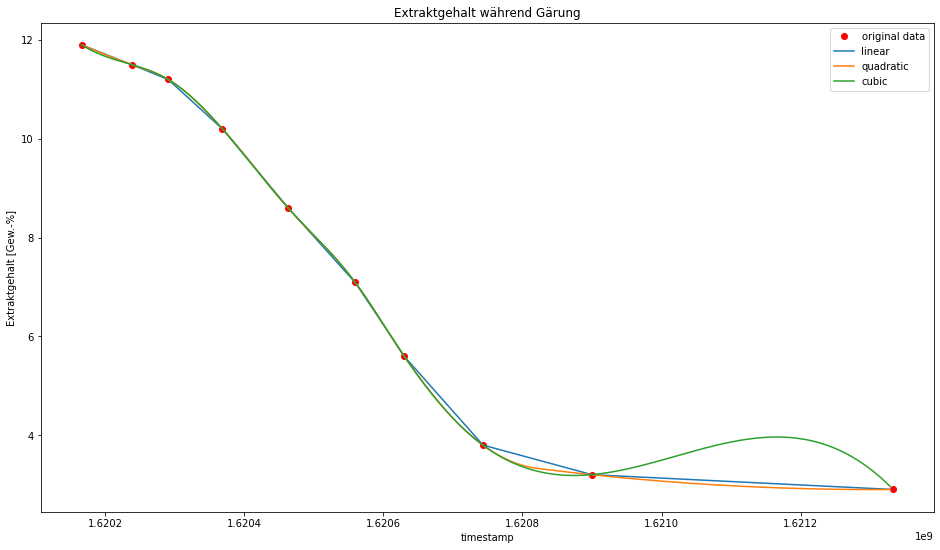

In [10]:
#######################################################
###         interpolation for wort values           ###
#######################################################
plt.figure(figsize=(16,9))
plt.title('Extraktgehalt während Gärung')
plt.plot(timestamps, wort_rest, 'ro', label='original data')

for kind in ['linear', 'quadratic', 'cubic']:
    f = interpolate.interp1d(timestamps, wort_rest, kind=kind)
    plt.plot(time, f(time), label=kind)

plt.xlabel('timestamp')
plt.ylabel('Extraktgehalt [Gew.-%]')
plt.legend()
plt.show()

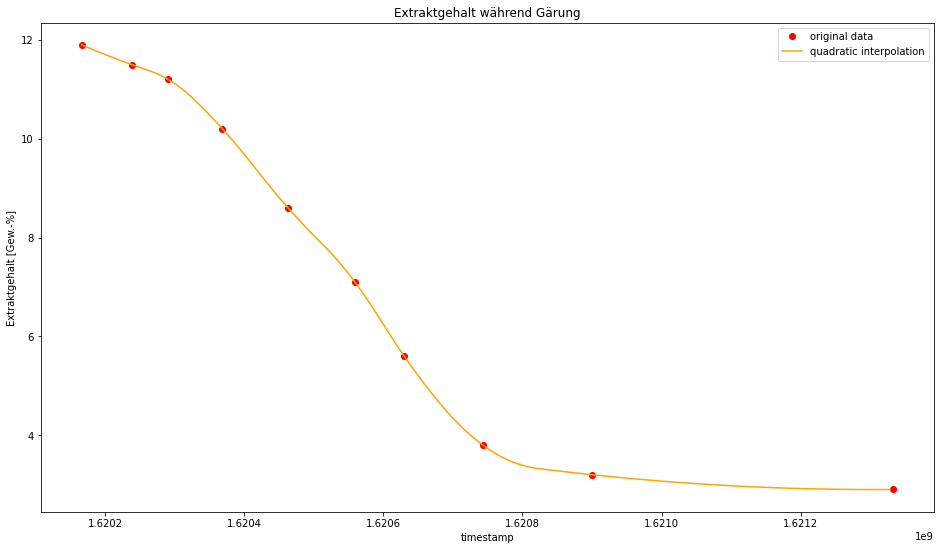

In [11]:
#################################################################
###         quadratic interpolation for wort values           ###
#################################################################

f = interpolate.interp1d(timestamps, wort_rest, kind='quadratic')

plt.figure(figsize=(16,9))
plt.title('Extraktgehalt während Gärung')
plt.plot(timestamps, wort_rest, 'ro', label='original data')
plt.plot(time, f(time), color='orange', label='quadratic interpolation')
plt.xlabel('timestamp')
plt.ylabel('Extraktgehalt [Gew.-%]')
plt.legend()
plt.show()